# Heteroclinic?　進化

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy

# Rabi

In [188]:
def winnerless_cpmpetition(T,J,th,x,gamma=1,dt=0.1,beta=1.,showparam=False):    
    xs=deepcopy(x)
    
    if(showparam):
        print(J)
        print(th)
            
    for t in range(T):
        A=J@(x+th)
        xx=np.tanh(beta*A)-gamma*x
        x=x+xx*dt
        xs=np.vstack([xs,x])
    xs=xs.T
    return xs

def winnerless_cpmpetition_r(N,T,seed=1,gamma=1,dt=0.1,beta=1.,showparam=False):    
    rng = np.random.default_rng(seed)
    J =np.array(rng.random(N*N)).reshape(N,N)-0.5
    th=np.array(rng.random(N))-0.5
    
    x=np.array(rng.random(N))-0.5  
    return winnerless_cpmpetition(T,J,th,x,gamma,dt,beta,showparam)


In [172]:
def encode_x(x):
    a=0
    for i in x:
        if(i>0):
            a=a*2+1
        else:
            a=a*2
    return a

def encode_xs(xs):
    return [encode_x(x) for x in xs]

def encode_uniq(xs):
    xs=encode_xs(xs)
    out=[0]
    for x in xs:
        if(x!=out[-1]):
            out.append(x)
    return out

def alluniq(xs):
    return list(set(xs))

def encode_alluniq(xs):
    return alluniq(encode_xs(xs))


## 軌跡を書いてみる

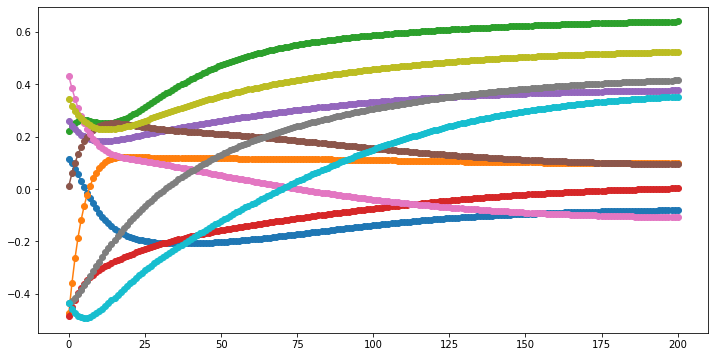

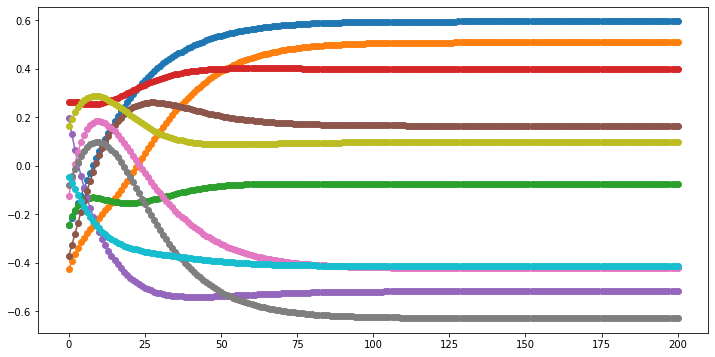

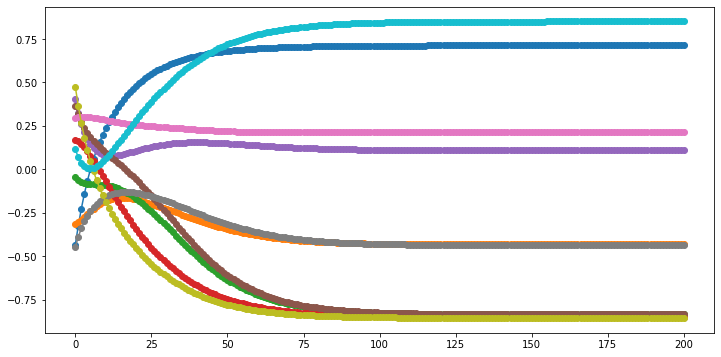

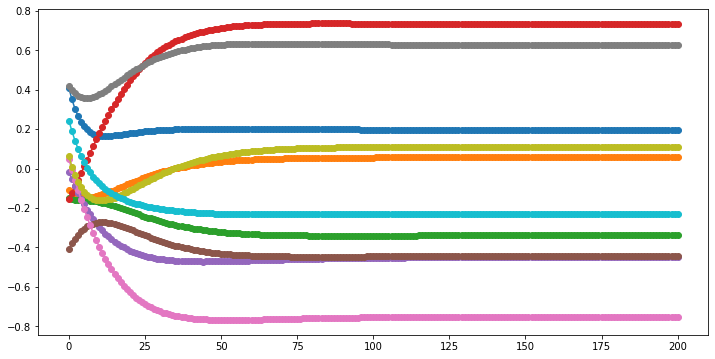

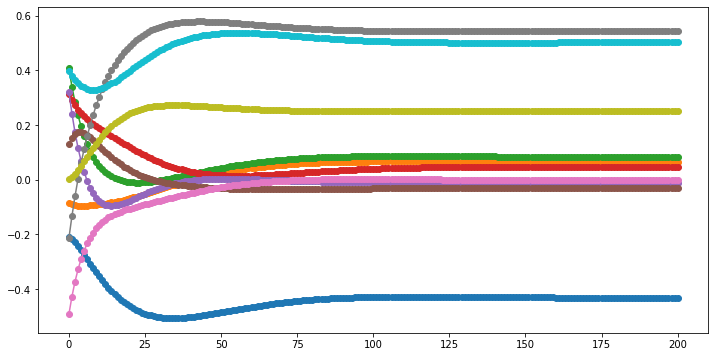

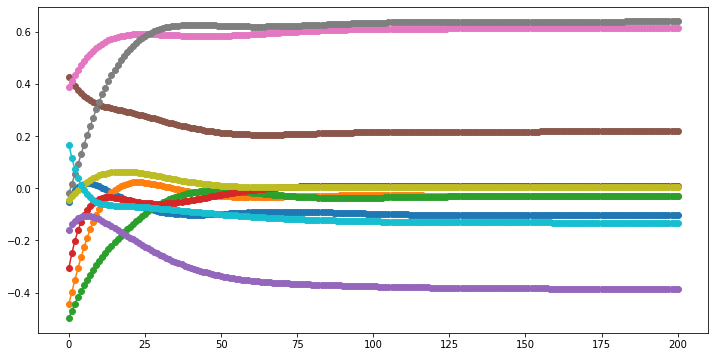

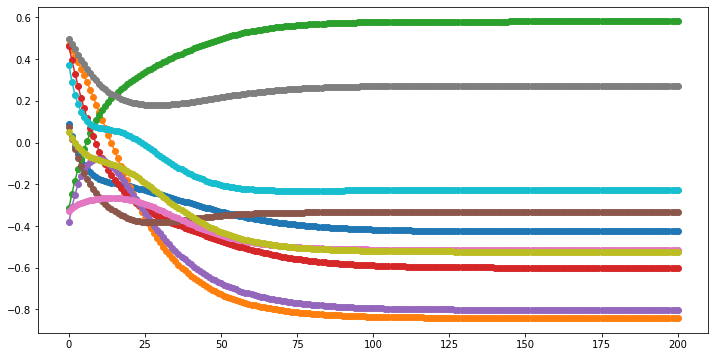

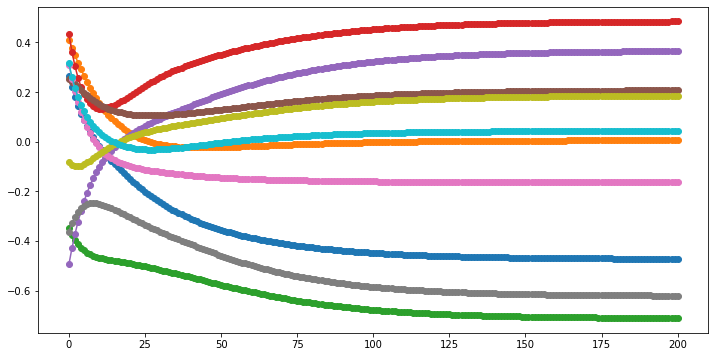

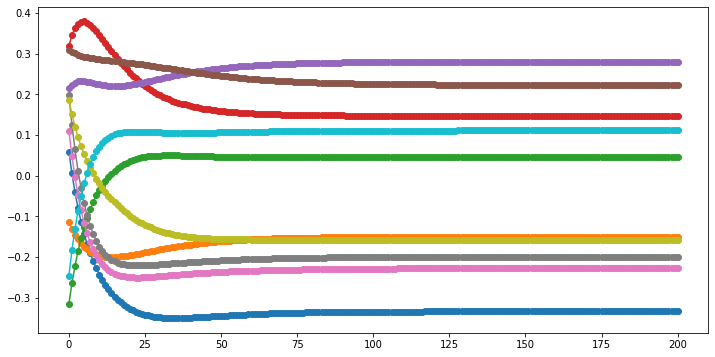

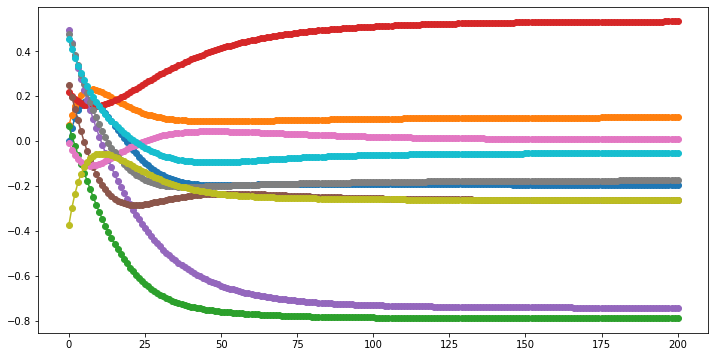

In [153]:
N=10
T=100
for r in range(10):
    xs=winnerless_cpmpetition(N,T,r)
    plt.figure(figsize=(12, 6))
    for i in range(N):
        plt.plot(xs[i],"-o")
    plt.show()
    

In [173]:
encode_uniq(xs.T)

[0, 1267, 1523, 1527, 1525, 1533, 1517, 1389, 1357, 1373]

In [157]:
N=12
T=1000

for r in range(10):
    print(r)
    xs=winnerless_cpmpetition(N,T,r)
    print(encode_uniq(xs.T))
#    plt.figure(figsize=(12, 6))
#    for i in range(N//4):
#        plt.plot(xs[i],"-o")
#    plt.show() 
    

0
[0, 2585, 2649, 2681, 2680, 2168, 2160, 112, 96, 112, 2160]
1
[0, 377, 345, 1369, 3401, 3913, 3915, 3907, 3651, 3587]
2
[0, 1935, 3983, 3999, 3991, 4023, 1975]
3
[0, 2908, 2840, 2872, 2616, 2617, 2105, 2233, 185]
4
[0, 3552, 3553, 3555, 3299]
5
[0, 1374, 1370, 1522, 1458, 1970, 1714, 1682, 1690]
6
[0, 894, 1022, 1006, 974, 3022, 3023]
7
[0, 107, 111, 109, 2285, 2221, 2477, 2493, 2365, 2333]
8
[0, 2341, 2085, 2084, 2212, 2720, 2688, 2944]
9
[0, 1267, 1523, 1527, 1525, 1533, 1517, 1389, 1357, 1373]


## 進化

パターンを長くするような進化

記憶容量

[12, 12, 12, 12, 14, 11, 12, 11, 13, 14, 12, 10, 12, 12, 13, 13, 12, 13, 12, 12]
[14, 11, 12, 12, 12, 14, 12, 13, 12, 10, 13, 11, 13, 17, 10, 13, 10, 12, 12, 10]
[17, 11, 17, 18, 12, 13, 17, 18, 12, 12, 13, 12, 17, 17, 11, 13, 15, 17, 12, 12]
[18, 20, 18, 19, 17, 16, 18, 12, 21, 18, 21, 14, 18, 19, 13, 22, 20, 19, 17, 19]
[22, 20, 19, 21, 14, 21, 22, 21, 18, 21, 22, 23, 18, 22, 19, 20, 20, 19, 21, 19]
[23, 19, 21, 22, 24, 23, 26, 19, 20, 20, 19, 23, 21, 17, 19, 21, 19, 19, 22, 13]
[26, 19, 21, 21, 20, 24, 22, 17, 23, 20, 23, 21, 21, 22, 20, 20, 24, 20, 18, 22]
[26, 19, 21, 20, 22, 21, 19, 23, 22, 15, 23, 20, 21, 17, 14, 20, 22, 20, 15, 20]
[26, 19, 22, 21, 19, 24, 20, 19, 21, 19, 21, 23, 18, 20, 22, 21, 24, 21, 18, 25]
[26, 17, 23, 19, 17, 20, 22, 18, 18, 21, 23, 18, 22, 23, 23, 18, 18, 20, 18, 17]
[26, 19, 22, 19, 20, 16, 22, 24, 22, 18, 20, 21, 23, 23, 19, 22, 17, 19, 24, 21]
[26, 21, 23, 19, 19, 21, 20, 22, 18, 19, 17, 24, 22, 23, 22, 23, 22, 20, 17, 22]
[26, 19, 24, 19, 17, 21, 16,

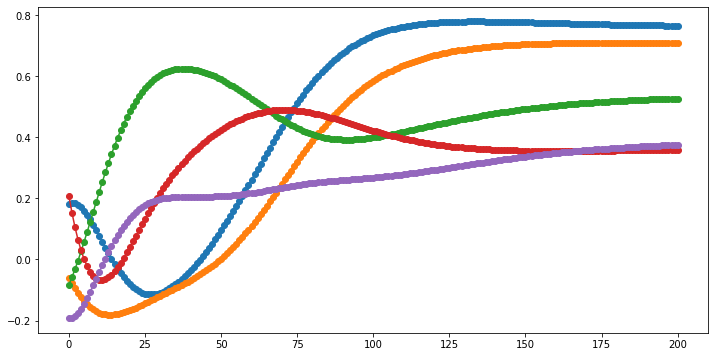

In [197]:
seed=1
N=20
T=200
evoterm=100
pool=20
eps=0.1

def evolve1(N,T,evoterm,pool,eps,seed):
#init
    rng = np.random.default_rng(seed)
    J =np.array(rng.random(N*N)).reshape(N,N)-0.5
    th=np.array(rng.random(N))-0.5

    xi=np.array(rng.random(N))-0.5
    
    for t in range(evoterm):
        Js=[J+rng.random(N*N).reshape(N,N)*eps-eps/2 for p in range(pool)]
        ths=[th+rng.random(N)*eps-eps/2 for p in range(pool)]
        Js[0]=J
        ths[0]=th

        lens=[]
        xss=[]
        for p in range(pool):
            xs=winnerless_cpmpetition(T,Js[p],ths[p],xi)       
            l=len(encode_alluniq(xs.T))
            lens.append(l)
            xss.append(xs)
            
        print(lens)
        maxi=np.argmax(lens)

        J=Js[maxi]
        th=ths[maxi]
        xs_max=xss[maxi]
        
    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.plot(xs_max[i],"-o")
    plt.show() 
    
evolve1(N,T,evoterm,pool,eps,seed)

[9, 9, 8, 10, 10, 10, 11, 9, 10, 9, 9, 10, 9, 11, 8, 9, 9, 11, 12, 10]
[12, 12, 10, 11, 11, 11, 12, 10, 12, 11, 12, 11, 9, 11, 10, 7, 9, 12, 10, 10]
[12, 10, 10, 11, 10, 10, 8, 10, 10, 8, 9, 11, 10, 10, 7, 9, 10, 10, 8, 10]
[12, 9, 11, 12, 11, 10, 10, 11, 11, 10, 9, 12, 9, 13, 9, 11, 12, 11, 10, 10]
[13, 10, 11, 8, 11, 12, 10, 9, 10, 11, 10, 9, 10, 8, 11, 9, 11, 10, 9, 11]
[13, 12, 10, 10, 10, 10, 8, 12, 11, 10, 11, 12, 11, 10, 11, 11, 9, 11, 10, 10]
[13, 11, 9, 11, 9, 12, 10, 9, 10, 12, 12, 12, 11, 9, 11, 13, 11, 10, 12, 12]
[13, 11, 10, 9, 8, 10, 11, 13, 11, 12, 12, 12, 8, 9, 10, 13, 9, 11, 9, 11]
[13, 9, 11, 11, 10, 10, 12, 11, 9, 9, 9, 12, 8, 10, 10, 12, 10, 12, 9, 12]
[13, 13, 10, 10, 9, 12, 11, 13, 12, 10, 9, 11, 9, 10, 9, 10, 10, 12, 12, 10]
[13, 9, 10, 10, 12, 10, 9, 11, 9, 11, 12, 10, 10, 8, 11, 9, 11, 11, 9, 11]
[13, 10, 10, 11, 9, 13, 10, 10, 9, 12, 12, 8, 10, 8, 12, 13, 9, 9, 11, 12]
[13, 11, 11, 10, 10, 10, 10, 9, 10, 13, 10, 10, 10, 9, 10, 11, 9, 10, 10, 11]
[13, 12, 8, 1

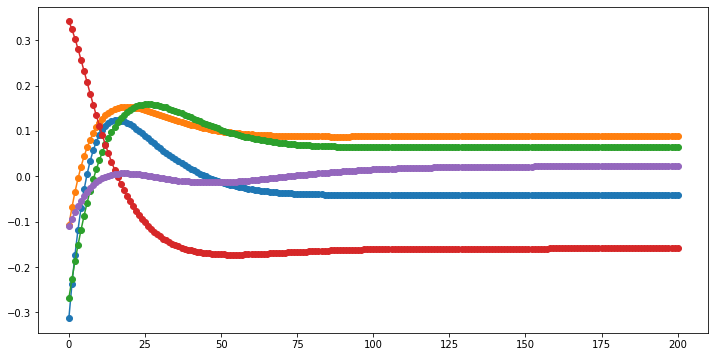

In [198]:
seed=1
N=20
T=200
evoterm=100
pool=20
eps=0.1

evolve1(12,T,evoterm,pool,eps,seed)